In [34]:
import pandas as pd
import numpy as np

In [35]:
df_train = pd.read_csv("../dataset/train.csv")
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
df_test = pd.read_csv("../dataset/test.csv")
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [37]:
df_train['WhatIsData'] = 'Train'
df_test['WhatIsData'] = 'Test'
df_test['SalePrice'] = 9999999999

df_all = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

df_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,WhatIsData
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Train


In [38]:
df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [39]:
df_test.isnull().sum()[df_test.isnull().sum()>0].sort_values(ascending=False)


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [40]:
na_col_list = df_all.isnull().sum()[df_all.isnull().sum()>0].index.tolist()
df_all[na_col_list].dtypes.sort_values()

TotalBsmtSF     float64
BsmtUnfSF       float64
BsmtFinSF2      float64
BsmtFinSF1      float64
GarageYrBlt     float64
BsmtFullBath    float64
GarageCars      float64
BsmtHalfBath    float64
GarageArea      float64
LotFrontage     float64
MasVnrArea      float64
GarageQual       object
GarageCond       object
GarageType       object
PoolQC           object
FireplaceQu      object
Fence            object
Functional       object
KitchenQual      object
GarageFinish     object
MSZoning         object
MiscFeature      object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Exterior2nd      object
Exterior1st      object
Utilities        object
Alley            object
Electrical       object
SaleType         object
dtype: object

In [41]:
na_float_cols = df_all[na_col_list].dtypes[df_all[na_col_list].dtypes=='float64'].index.tolist()
na_obj_cols = df_all[na_col_list].dtypes[df_all[na_col_list].dtypes=='object'].index.tolist()

for na_float_col in na_float_cols:
    df_all.loc[df_all[na_float_col].isnull(), na_float_col] = 0.0

for na_obj_col in na_obj_cols:
    df_all.loc[df_all[na_obj_col].isnull(), na_obj_col] = 'NA'

In [42]:
df_all.isnull().sum()[df_all.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [43]:

cat_cols = df_all.dtypes[df_all.dtypes=='object'].index.tolist()

num_cols = df_all.dtypes[df_all.dtypes!='object'].index.tolist()

other_cols = ['Id','WhatIsData']

cat_cols.remove('WhatIsData')
num_cols.remove('Id')

df_all_cat = pd.get_dummies(df_all[cat_cols])

df_alldata = pd.concat([df_all[other_cols],df_all[num_cols],df_all_cat],axis=1)

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

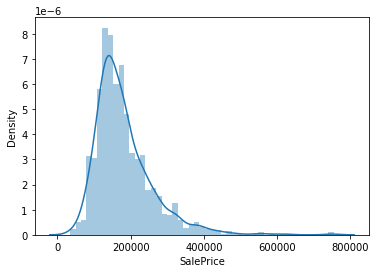

In [44]:
df_alldata.head()

import seaborn as sns

sns.distplot(df_train['SalePrice'])


/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

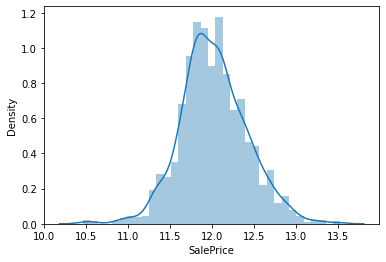

In [45]:
sns.distplot(np.log(df_train['SalePrice']))

#続き　https://yolo-kiyoshi.com/2018/12/17/post-1003/

In [46]:
df_train_ = df_alldata[df_alldata['WhatIsData'] == 'Train'].drop(['WhatIsData', 'Id'], axis=1).reset_index(drop=True)
df_test_ = df_alldata[df_alldata['WhatIsData'] == 'Test'].drop(['WhatIsData', 'SalePrice'], axis=1).reset_index(drop=True)

train_x_ = df_train_.drop('SalePrice', axis=1)
train_y_ = np.log(df_train_['SalePrice']);

test_id = df_test_['Id']
test_data = df_test_.drop('Id', axis=1)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import (
    Lasso
)
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
param_grid = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
cnt = 0
for alpha in param_grid:
    ls = Lasso(alpha=alpha)
    pipeline = make_pipeline(scaler, ls)
    X_train, X_test, y_train, y_test = train_test_split(train_x_, train_y_, test_size=0.3, random_state=0)
    pipeline.fit(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))
    if cnt == 0:
        best_score = test_rmse
        best_estimator = pipeline
        best_param = alpha
    elif best_score > test_rmse:
        best_score = test_rmse
        best_estimator = pipeline
        best_param = alpha
    else:
        pass
    cnt = cnt + 1

print('alpha : ' + str(best_param))
print('test score is : ' + str(best_score))

alpha : 0.01
test score is : 0.18072873354655125


In [48]:
ls = Lasso(alpha = 0.01)
pipeline = make_pipeline(scaler, ls)
pipeline.fit(train_x_, train_y_)
test_SalePrice = pd.DataFrame(np.exp(pipeline.predict(test_data)), columns=['SalePrice'])
test_Id = pd.DataFrame(test_id, columns=['Id'])
pd.concat([test_Id, test_SalePrice], axis=1).to_csv('../submissions/submit_note_1.csv', index=False)
